1.Question 1

For this dataset I was required to assess a pre-saved data set called 'data.csv'. The data set stores the information about the customers' pattern of behaviour at a restaurant. It includes the following columns: total bill, tip, smoker, day, time and size.

I thought it would be interesting to analyze some meaningful points about the data. Here are the points I've thought of.

- Do people tip more when they pay more?
- Which size group visits the most?
- When is the busiest day, and when is the most quietest day?
- Top 5 people who payed the most including all of the days.
- Top 5 people who tipped the most including all of the days.
- Which day had the most smokers visit?
- Were there more smokers or more non-smokers?
- Do people pay more if there is a smoker in the group?
- What is the mean of tips?
- What is the mean of total bills?

2. Set Up

In order to start coding, we need to import the necessary modules first.

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

3. Import Dataset

In [3]:
restaurant = pd.read_csv('data.csv')
restaurant

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


4. Finding out data type and performing data cleaning

In [4]:
restaurant.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
dtype: object

In [5]:
restaurant.dropna

<bound method DataFrame.dropna of      total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]>

5. Data Analyzation

We will first see the top 5 customers who paid the most bills and tips

In [6]:
#top 5 total bills
restaurant.sort_values(by='total_bill', ascending=False).head()

,total_bill,tip,smoker,day,time,size
170,50.81,10.00,Yes,Sat,Dinner,3
212,48.33,9.00,No,Sat,Dinner,4
59,48.27,6.73,No,Sat,Dinner,4
156,48.17,5.00,No,Sun,Dinner,6
182,45.35,3.50,Yes,Sun,Dinner,3


In [7]:
#top 5 total tips
restaurant.sort_values(by='tip', ascending=False).head()

#we can see that customer170 is top 1 in both total bills and tips

,total_bill,tip,smoker,day,time,size
170,50.81,10.00,Yes,Sat,Dinner,3
212,48.33,9.00,No,Sat,Dinner,4
23,39.42,7.58,No,Sat,Dinner,4
59,48.27,6.73,No,Sat,Dinner,4
141,34.30,6.70,No,Thur,Lunch,6


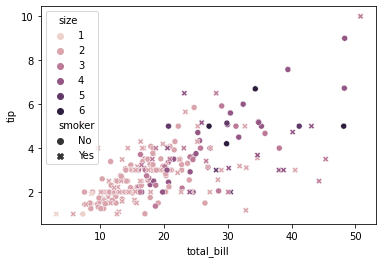

In [8]:
#We will look at the relations of size of groups, total_bill and tips
#The style is defined by 'smoker' to see if the group included someone who smokes

sns.scatterplot(data=restaurant, x="total_bill", y="tip", hue='size',style=restaurant['smoker'])

plt.show()

#Lot of the dots are concentrated at the 10~20 column for total_bills, which means people were more likely to pay less.
#More dots have a lighter tone which means people tend to come in smaller groups of 1~3
#Difference between the amount of smokers and non-smokers are not that distinctive, we will look into this by calculating actual numbers later on in this report.


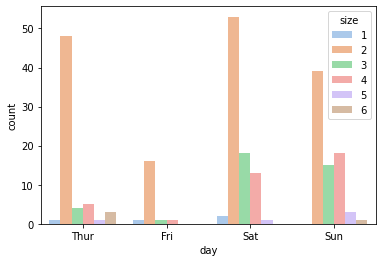

In [9]:
#creating days to separate each day for analyzation
days = ['Thur', 'Fri', 'Sat', 'Sun']
sns.countplot(x =("day"), hue="size", palette='pastel', data=restaurant, order=days)
plt.show()

#People visit in groups of 2 the most. Saturday is the busiest day and Friday is the most quiet day. 
#Size 2,3,4 are the most prominent groups in this graph, and the rest of the sizes indicates a very few number of visits.

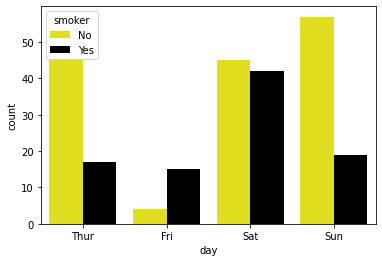

In [10]:
smoker_count = dict(Yes="Black", No="Yellow")
sns.countplot(x="day", hue="smoker", data=restaurant, palette=smoker_count, order=days)
plt.show()

#There are more non-smokers than smokers in general.
#Friday is the only day that smokers outnumber non-smokers.
#At Saturday, the count for smokers and non-smokers are almost equal.

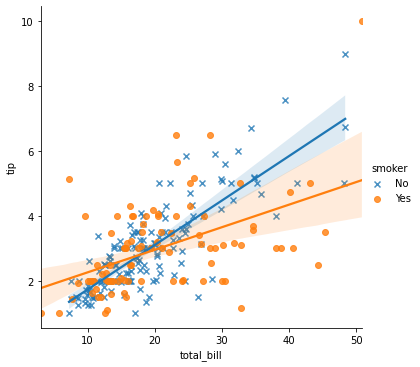

In [11]:
#Relation between amount of smokers and total_bill and tips

n = sns.lmplot(x='total_bill', y='tip', hue='smoker', data=restaurant, markers=['x','o'])

#It does not seem like people pay more because there is a smoker in the group. 
#People actually pay more when there are no smokers in the group.
#But this could be influenced by the size of the group so we cannot be absolutely sure about the result.

In [12]:
#Mean of total bill, tip and size of groups
restaurant.mean(axis=0)

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [13]:
#If you need more information than mean you can use 'describe' to retrieve the statistical informations.
restaurant.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


2. Question 2

#Create 16 Series

In [14]:
hs1 = pd.Series(['Oslo University Hospital','Oslo',2009,'Aker, Riks, Ullevål','With over 24,000 employees it is the largest hospital organization in Europe.'], 
      index = ['name','major_location','established','main_campus','description'])

hs1

name                                       Oslo University Hospital
major_location                                                 Oslo
established                                                    2009
main_campus                                     Aker, Riks, Ullevål
description       With over 24,000 employees it is the largest h...
dtype: object

In [15]:
hs2 = pd.Series(['Møre og Romsdal Hospital Trust','Ålesund',2011,'Kristiansund,Molde,Ålesund,Volda','The trust is owned by Central Norway Regional Health Authority'],
               index=['name','major_location','established','main_campus','description'])
hs2


name                                 Møre og Romsdal Hospital Trust
major_location                                              Ålesund
established                                                    2011
main_campus                        Kristiansund,Molde,Ålesund,Volda
description       The trust is owned by Central Norway Regional ...
dtype: object

In [16]:
hs3 = pd.Series(['Nord-Trøndelag Health Trust','Nord-Trøndelag',2012,'Levanger, Namsos','The trust has about 2,500 employees and has about 200,000 patient contacts per year'], 
      index = ['name','major_location','established','main_campus','description'])

hs3

name                                    Nord-Trøndelag Health Trust
major_location                                       Nord-Trøndelag
established                                                    2012
main_campus                                        Levanger, Namsos
description       The trust has about 2,500 employees and has ab...
dtype: object

In [17]:
hs4 = pd.Series(['St.Olavs University Hospital','Trondheim',1902,'Øya','It performed 274,441 somatic and 88,692 psychiatric consultations in 2005 with 8,691 employees and a budget of Norwegian krone 5.1 billion.'], 
      index = ['name','major_location','established','main_campus','description'])
hs4

name                                   St.Olavs University Hospital
major_location                                            Trondheim
established                                                    1902
main_campus                                                     Øya
description       It performed 274,441 somatic and 88,692 psychi...
dtype: object

In [18]:
hs5 = pd.Series(['Finnmark Hospital Trust','Finnmark',2005,'Hammerfest, Kirkenes','The trust is part of Northern Norway Regional Health Authority and headquartered in Hammerfest.'], 
      index = ['name','major_location','established','main_campus','description'])
hs5

name                                        Finnmark Hospital Trust
major_location                                             Finnmark
established                                                    2005
main_campus                                    Hammerfest, Kirkenes
description       The trust is part of Northern Norway Regional ...
dtype: object

In [19]:
hs6 = pd.Series(['Helgeland Hospital Trust','Helgeland',2002,'Mo i Rana, Mosjøen, Sandnessjøen','It has a polyclinic in Brønnøysund'], 
      index = ['name','major_location','established','main_campus','description'])
hs6

name                        Helgeland Hospital Trust
major_location                             Helgeland
established                                     2002
main_campus         Mo i Rana, Mosjøen, Sandnessjøen
description       It has a polyclinic in Brønnøysund
dtype: object

In [20]:
hs7 = pd.Series(['Nordland Hospital Trust','Nordland',2002,'Bodø,Rønvik,Lofoten,Vesterålen','Manages several minor psychiatric treatment facilities in the county.'], 
      index = ['name','major_location','established','main_campus','description'])

hs7

name                                        Nordland Hospital Trust
major_location                                             Nordland
established                                                    2002
main_campus                          Bodø,Rønvik,Lofoten,Vesterålen
description       Manages several minor psychiatric treatment fa...
dtype: object

In [21]:
hs8 = pd.Series(['Akershus University Hospital','Greater Oslo',1961,'Lørenskog','Since 2002, the university hospital has figured prominently in medical research and medical education.'], 
      index = ['name','major_location','established','main_campus','description'])

hs8

name                                   Akershus University Hospital
major_location                                         Greater Oslo
established                                                    1961
main_campus                                               Lørenskog
description       Since 2002, the university hospital has figure...
dtype: object

In [22]:
hs9 = pd.Series(['Innlandet Hospital Trust','Hedmark,Oppland',2001,'Elverum-Hamar,Gjøvik,Lillehammer,Kongsvinger,Tynset','It is owned by Southern and Eastern Norway Regional Health Authority.'], 
      index = ['name','major_location','established','main_campus','description'])
hs9

name                                       Innlandet Hospital Trust
major_location                                      Hedmark,Oppland
established                                                    2001
main_campus       Elverum-Hamar,Gjøvik,Lillehammer,Kongsvinger,T...
description       It is owned by Southern and Eastern Norway Reg...
dtype: object

In [23]:
hs10 = pd.Series(['Vestre Viken Hospital Trust','Drammen',1878,'Kongsberg, Ringerike, Bærum, Drammen','It covers an area with 470,000 residents in 26 municipalities.'], 
      index = ['name','major_location','established','main_campus','description'])
hs10

name                                    Vestre Viken Hospital Trust
major_location                                              Drammen
established                                                    1878
main_campus                    Kongsberg, Ringerike, Bærum, Drammen
description       It covers an area with 470,000 residents in 26...
dtype: object

In [24]:
hs11 = pd.Series(['Telemark Hospital Trust','Skien',1988,'Skien','The total employees in 2003 were 2750, of which 215 were doctors.'], 
      index = ['name','major_location','established','main_campus','description'])
hs11

name                                        Telemark Hospital Trust
major_location                                                Skien
established                                                    1988
main_campus                                                   Skien
description       The total employees in 2003 were 2750, of whic...
dtype: object

In [25]:
hs12 = pd.Series(['Vestfold Hospital Trust','Vestfold',1870,'Tønsberg','It is owned by the Norwegian state through Southern and Eastern Norway Regional Health Authority.'], 
      index = ['name','major_location','established','main_campus','description'])
hs12

name                                        Vestfold Hospital Trust
major_location                                             Vestfold
established                                                    1870
main_campus                                                Tønsberg
description       It is owned by the Norwegian state through Sou...
dtype: object

In [26]:
hs13 = pd.Series(['Hospital of Southern Norway','Agder',2003,'Arendal,Flekkefjord,Kristiansand','There are also smaller centres at Risør, Grimstad, Mandal and Farsund.'], 
      index = ['name','major_location','established','main_campus','description'])
hs13

name                                    Hospital of Southern Norway
major_location                                                Agder
established                                                    2003
main_campus                        Arendal,Flekkefjord,Kristiansand
description       There are also smaller centres at Risør, Grims...
dtype: object

In [27]:
hs14 = pd.Series(['Fonna Hospital Trust','Haugesund',2002,'Haugaland,Sunnhordland,Hardanger','Fonna Health Trust is one of five local health trusts owned by Western Norway Regional Health Authority.'], 
      index = ['name','major_location','established','main_campus','description'])
hs14

name                                           Fonna Hospital Trust
major_location                                            Haugesund
established                                                    2002
main_campus                        Haugaland,Sunnhordland,Hardanger
description       Fonna Health Trust is one of five local health...
dtype: object

In [28]:
hs15 = pd.Series(['Førde Hospital Trust','Sogn og Fjordane',2002,'Nordfjord,Sunnfjord,Sogn','There are six clinics and one division, divided into four hospitals and other somatic and psychiatric institutions in Nordfjord, Sunnfjord and Sogn.'], 
      index = ['name','major_location','established','main_campus','description'])
hs15

name                                           Førde Hospital Trust
major_location                                     Sogn og Fjordane
established                                                    2002
main_campus                                Nordfjord,Sunnfjord,Sogn
description       There are six clinics and one division, divide...
dtype: object

In [29]:
hs16 = pd.Series(['Bergen Hospital Trust','Bergen',2002,'Hordaland','One of the five health trusts owned by the Western Norway Regional Health Authority.'], 
      index = ['name','major_location','established','main_campus','description'])

hs16

name                                          Bergen Hospital Trust
major_location                                               Bergen
established                                                    2002
main_campus                                               Hordaland
description       One of the five health trusts owned by the Wes...
dtype: object

#Create Dataframes

In [30]:
df1 = pd.DataFrame(hs1)
df1

,0
name,Oslo University Hospital
major_location,Oslo
established,2009
main_campus,"Aker, Riks, Ullevål"
description,"With over 24,000 employees it is the largest h..."


In [31]:
df2 = pd.DataFrame(hs2)
df2

,0
name,Møre og Romsdal Hospital Trust
major_location,Ålesund
established,2011
main_campus,"Kristiansund,Molde,Ålesund,Volda"
description,The trust is owned by Central Norway Regional ...


In [32]:
df3 = pd.DataFrame(hs3)
df3

,0
name,Nord-Trøndelag Health Trust
major_location,Nord-Trøndelag
established,2012
main_campus,"Levanger, Namsos"
description,"The trust has about 2,500 employees and has ab..."


In [33]:
df4 = pd.DataFrame(hs4)
df4

,0
name,St.Olavs University Hospital
major_location,Trondheim
established,1902
main_campus,Øya
description,"It performed 274,441 somatic and 88,692 psychi..."


In [34]:
df5 = pd.DataFrame(hs5)
df5

,0
name,Finnmark Hospital Trust
major_location,Finnmark
established,2005
main_campus,"Hammerfest, Kirkenes"
description,The trust is part of Northern Norway Regional ...


In [35]:
df6 = pd.DataFrame(hs6)
df6

,0
name,Helgeland Hospital Trust
major_location,Helgeland
established,2002
main_campus,"Mo i Rana, Mosjøen, Sandnessjøen"
description,It has a polyclinic in Brønnøysund


In [36]:
df7 = pd.DataFrame(hs7)
df7

,0
name,Nordland Hospital Trust
major_location,Nordland
established,2002
main_campus,"Bodø,Rønvik,Lofoten,Vesterålen"
description,Manages several minor psychiatric treatment fa...


In [37]:
df8 = pd.DataFrame(hs8)
df8

,0
name,Akershus University Hospital
major_location,Greater Oslo
established,1961
main_campus,Lørenskog
description,"Since 2002, the university hospital has figure..."


In [38]:
df9 = pd.DataFrame(hs9)
df9

,0
name,Innlandet Hospital Trust
major_location,"Hedmark,Oppland"
established,2001
main_campus,"Elverum-Hamar,Gjøvik,Lillehammer,Kongsvinger,T..."
description,It is owned by Southern and Eastern Norway Reg...


In [39]:
df10 = pd.DataFrame(hs10)
df10

,0
name,Vestre Viken Hospital Trust
major_location,Drammen
established,1878
main_campus,"Kongsberg, Ringerike, Bærum, Drammen"
description,"It covers an area with 470,000 residents in 26..."


In [41]:
df11 = pd.DataFrame(hs11)
df11

,0
name,Telemark Hospital Trust
major_location,Skien
established,1988
main_campus,Skien
description,"The total employees in 2003 were 2750, of whic..."


In [42]:
df12 = pd.DataFrame(hs12)
df12

,0
name,Vestfold Hospital Trust
major_location,Vestfold
established,1870
main_campus,Tønsberg
description,It is owned by the Norwegian state through Sou...


In [43]:
df13 = pd.DataFrame(hs13)
df13

,0
name,Hospital of Southern Norway
major_location,Agder
established,2003
main_campus,"Arendal,Flekkefjord,Kristiansand"
description,"There are also smaller centres at Risør, Grims..."


In [44]:
df14 = pd.DataFrame(hs14)
df14

,0
name,Fonna Hospital Trust
major_location,Haugesund
established,2002
main_campus,"Haugaland,Sunnhordland,Hardanger"
description,Fonna Health Trust is one of five local health...


In [45]:
df15 = pd.DataFrame(hs15)
df15

,0
name,Førde Hospital Trust
major_location,Sogn og Fjordane
established,2002
main_campus,"Nordfjord,Sunnfjord,Sogn"
description,"There are six clinics and one division, divide..."


In [46]:
df16 = pd.DataFrame(hs16)
df16

,0
name,Bergen Hospital Trust
major_location,Bergen
established,2002
main_campus,Hordaland
description,One of the five health trusts owned by the Wes...


#Concatenate all data frames into one

In [47]:
hospitals = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16],axis=1)

#transposing for better visuals
Hospitals = hospitals.T
Hospitals

,name,major_location,established,main_campus,description
0,Oslo University Hospital,Oslo,2009,"Aker, Riks, Ullevål","With over 24,000 employees it is the largest h..."
0,Møre og Romsdal Hospital Trust,Ålesund,2011,"Kristiansund,Molde,Ålesund,Volda",The trust is owned by Central Norway Regional ...
0,Nord-Trøndelag Health Trust,Nord-Trøndelag,2012,"Levanger, Namsos","The trust has about 2,500 employees and has ab..."
0,St.Olavs University Hospital,Trondheim,1902,Øya,"It performed 274,441 somatic and 88,692 psychi..."
0,Finnmark Hospital Trust,Finnmark,2005,"Hammerfest, Kirkenes",The trust is part of Northern Norway Regional ...
0,Helgeland Hospital Trust,Helgeland,2002,"Mo i Rana, Mosjøen, Sandnessjøen",It has a polyclinic in Brønnøysund
0,Nordland Hospital Trust,Nordland,2002,"Bodø,Rønvik,Lofoten,Vesterålen",Manages several minor psychiatric treatment fa...
0,Akershus University Hospital,Greater Oslo,1961,Lørenskog,"Since 2002, the university hospital has figure..."
0,Innlandet Hospital Trust,"Hedmark,Oppland",2001,"Elverum-Hamar,Gjøvik,Lillehammer,Kongsvinger,T...",It is owned by Southern and Eastern Norway Reg...
0,Vestre Viken Hospital Trust,Drammen,1878,"Kongsberg, Ringerike, Bærum, Drammen","It covers an area with 470,000 residents in 26..."


#Insert new column called 'Regional Health Authority'

In [48]:
Hospitals.insert(loc=4, column="Regional Health Authority", value=['Southern and Eastern Norway Regional Health Authority','Central Norway Regional Health Authority',
'Central Norway Regional Health Authority','Central Norway Regional Health Authority',
'Northern Norway Regional Health Authority','Northern Norway Regional Health Authority',
'Northern Norway Regional Health Authority','Southern and Eastern Norway Regional Health Authority',
'Southern and Eastern Norway Regional Health Authority','Southern and Eastern Norway Regional Health Authority',
'Southern and Eastern Norway Regional Health Authority','Southern and Eastern Norway Regional Health Authority',
'Southern and Eastern Norway Regional Health Authority','Western Norway Regional Health Authority',
'Western Norway Regional Health Authority','Western Norway Regional Health Authority'])

Hospitals

,name,major_location,established,main_campus,Regional Health Authority,description
0,Oslo University Hospital,Oslo,2009,"Aker, Riks, Ullevål",Southern and Eastern Norway Regional Health Au...,"With over 24,000 employees it is the largest h..."
0,Møre og Romsdal Hospital Trust,Ålesund,2011,"Kristiansund,Molde,Ålesund,Volda",Central Norway Regional Health Authority,The trust is owned by Central Norway Regional ...
0,Nord-Trøndelag Health Trust,Nord-Trøndelag,2012,"Levanger, Namsos",Central Norway Regional Health Authority,"The trust has about 2,500 employees and has ab..."
0,St.Olavs University Hospital,Trondheim,1902,Øya,Central Norway Regional Health Authority,"It performed 274,441 somatic and 88,692 psychi..."
0,Finnmark Hospital Trust,Finnmark,2005,"Hammerfest, Kirkenes",Northern Norway Regional Health Authority,The trust is part of Northern Norway Regional ...
0,Helgeland Hospital Trust,Helgeland,2002,"Mo i Rana, Mosjøen, Sandnessjøen",Northern Norway Regional Health Authority,It has a polyclinic in Brønnøysund
0,Nordland Hospital Trust,Nordland,2002,"Bodø,Rønvik,Lofoten,Vesterålen",Northern Norway Regional Health Authority,Manages several minor psychiatric treatment fa...
0,Akershus University Hospital,Greater Oslo,1961,Lørenskog,Southern and Eastern Norway Regional Health Au...,"Since 2002, the university hospital has figure..."
0,Innlandet Hospital Trust,"Hedmark,Oppland",2001,"Elverum-Hamar,Gjøvik,Lillehammer,Kongsvinger,T...",Southern and Eastern Norway Regional Health Au...,It is owned by Southern and Eastern Norway Reg...
0,Vestre Viken Hospital Trust,Drammen,1878,"Kongsberg, Ringerike, Bærum, Drammen",Southern and Eastern Norway Regional Health Au...,"It covers an area with 470,000 residents in 26..."


3. Question 3

In the first part I will look into various aspects of all of the hospitals, and in the second part I will look into Oslo University Hospital specifically.

In part 1, there are a few points I will explore:
- How many patients are staying in the hospital currently?
- How many number of beds are available currently?

#Inserting necessary columns

I will insert the following columns: 
'Current Number of Patients'
'Current Number of Available Beds'

In [49]:
Hospitals.insert(loc=5, column='Current Number of Patients', value = [1320,938,392,311,123,164,189,428,522,194,822,135,428,722,572,482])
Hospitals.insert(loc=6, column='Current Number of Available Beds', value = [500,210,492,210,293,92,104,482,183,192,301,481,320,110,84,288])

Hospitals

,name,major_location,established,main_campus,Regional Health Authority,Current Number of Patients,Current Number of Available Beds,description
0,Oslo University Hospital,Oslo,2009,"Aker, Riks, Ullevål",Southern and Eastern Norway Regional Health Au...,1320,500,"With over 24,000 employees it is the largest h..."
0,Møre og Romsdal Hospital Trust,Ålesund,2011,"Kristiansund,Molde,Ålesund,Volda",Central Norway Regional Health Authority,938,210,The trust is owned by Central Norway Regional ...
0,Nord-Trøndelag Health Trust,Nord-Trøndelag,2012,"Levanger, Namsos",Central Norway Regional Health Authority,392,492,"The trust has about 2,500 employees and has ab..."
0,St.Olavs University Hospital,Trondheim,1902,Øya,Central Norway Regional Health Authority,311,210,"It performed 274,441 somatic and 88,692 psychi..."
0,Finnmark Hospital Trust,Finnmark,2005,"Hammerfest, Kirkenes",Northern Norway Regional Health Authority,123,293,The trust is part of Northern Norway Regional ...
0,Helgeland Hospital Trust,Helgeland,2002,"Mo i Rana, Mosjøen, Sandnessjøen",Northern Norway Regional Health Authority,164,92,It has a polyclinic in Brønnøysund
0,Nordland Hospital Trust,Nordland,2002,"Bodø,Rønvik,Lofoten,Vesterålen",Northern Norway Regional Health Authority,189,104,Manages several minor psychiatric treatment fa...
0,Akershus University Hospital,Greater Oslo,1961,Lørenskog,Southern and Eastern Norway Regional Health Au...,428,482,"Since 2002, the university hospital has figure..."
0,Innlandet Hospital Trust,"Hedmark,Oppland",2001,"Elverum-Hamar,Gjøvik,Lillehammer,Kongsvinger,T...",Southern and Eastern Norway Regional Health Au...,522,183,It is owned by Southern and Eastern Norway Reg...
0,Vestre Viken Hospital Trust,Drammen,1878,"Kongsberg, Ringerike, Bærum, Drammen",Southern and Eastern Norway Regional Health Au...,194,192,"It covers an area with 470,000 residents in 26..."


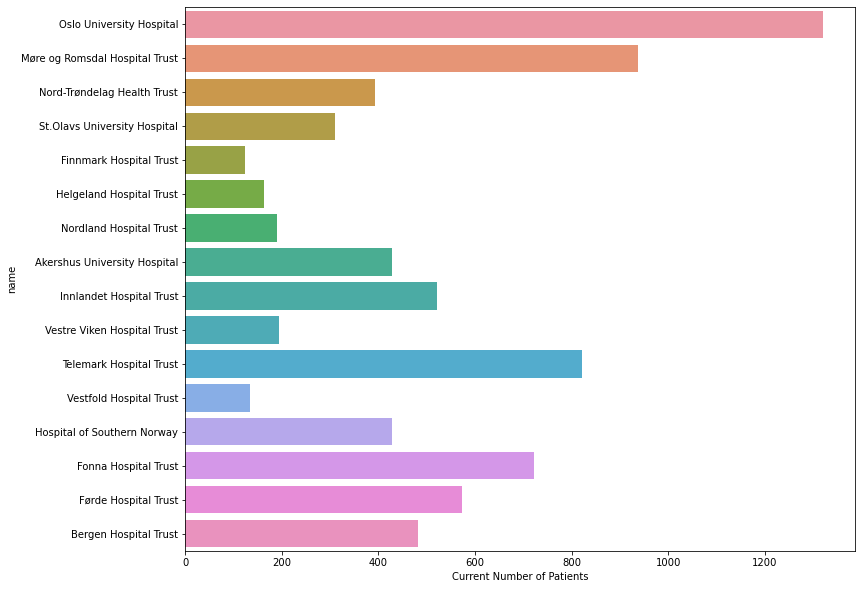

In [50]:
#Visualization of current number of patients
#Using barplot to compare

plt.figure(figsize=(12,10))
sns.barplot(
    data= Hospitals,  
    x = "Current Number of Patients",
    y = "name"
)

plt.show()


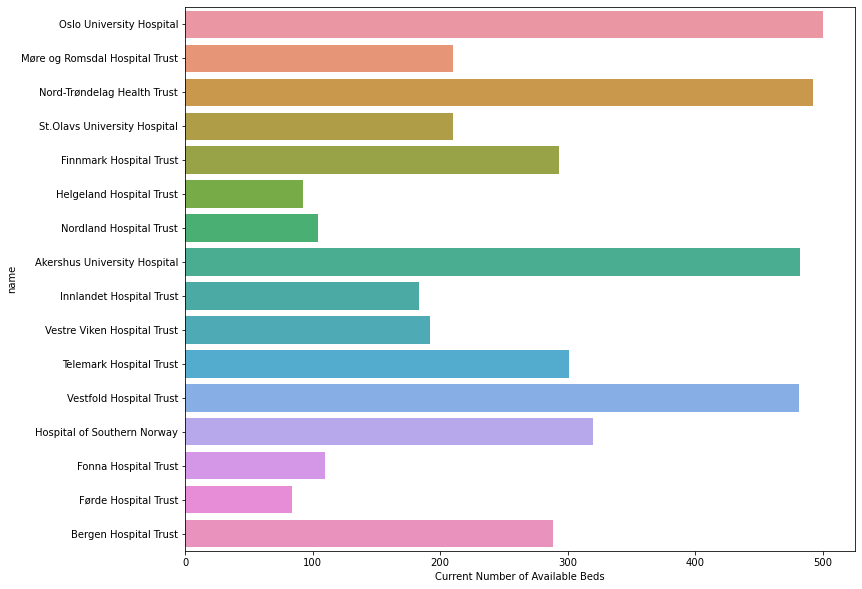

In [52]:
plt.figure(figsize=(12,10))
sns.barplot(
    data= Hospitals,
    y= "name",
    x= "Current Number of Available Beds"
)
plt.show()

From the two graphs above we can see that Oslo University Hospital has the most patients currently staying at the hospital. There are the least patients in Finnmark Hospital.

Oslo University Hospital tops again at current number of available beds, and as a result we can assume that it has the most large capacity out of all of the hospitals compared. Nord-Trøndelag Hospital, Akerhus University Hospital and Vestfold Hospital also has almost the same amount of available beds, scoring the top4.

Helgeland Hospital, Førde Hospital has the least amount of available bed, the sum around 100 beds. Nordland Hospital and Fonna Hospital also has around 100 beds left.

Helgeland Hospital and Nordland Hospital scores low in both number of patients and beds, they would have to make room for improvement in the coming years.

In Part 2, I will assess Oslo University Hospital specifically. 

I will specify the following questions:
- Patient Satisfaction
- Patient Count by Week (Inpatient / Outpatient)

In [54]:
#Making a DataFrame regarding patient satisfaction
#Create Pieplot to compare the percentage

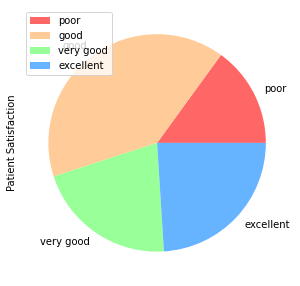

In [87]:
ps = pd.DataFrame({'Patient Satisfaction': [15,40,21,24]},
                  index=['poor', 'good', 'very good', 'excellent'])
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
plot = ps.plot.pie(y='Patient Satisfaction', figsize=(5, 5), colors=colors)

#I brought the color code from this site: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

Almost half of the patients answered 'good' on the service they received at the hospital. The least people answered 'poor', which means most of the people were somewhat satisfied with Oslo University Hospital. 

In [58]:
#Making a DataFrame regarding patient count by week
#I will make two DataFrames, differentiating incoming patients and patients who are leaving the hospital.

In [75]:
in_patients = pd.DataFrame({'In Patients':[295,391,528,402,321,582,691,272]},
                          {index=['week 34','week 35','week 36','week 37','week 38','week 39','week 40','week 41'])
out_patients = pd.DataFrame({'Out Patients':[731,381,582,199,572,682,723,119]},
                           index=['week 34','week 35','week 36','week 37','week 38','week 39','week 40','week 41'])

In [77]:
in_patients

,In Patients
week 34,295
week 35,391
week 36,528
week 37,402
week 38,321
week 39,582
week 40,691
week 41,272


In [78]:
out_patients

,Out Patients
week 34,731
week 35,381
week 36,582
week 37,199
week 38,572
week 39,682
week 40,723
week 41,119


In [79]:
#concat two dataframes

In [81]:
patient_count = pd.concat([in_patients, out_patients], axis=1)
patient_count

,In Patients,Out Patients
week 34,295,731
week 35,391,381
week 36,528,582
week 37,402,199
week 38,321,572
week 39,582,682
week 40,691,723
week 41,272,119


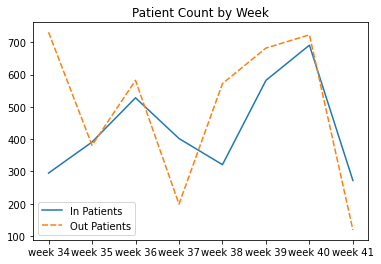

In [84]:
#Create Lineplot with the concatenated dataframe

sns.lineplot(data=patient_count)
plt.title('Patient Count by Week')
plt.show()

The graph above depicts the change of number of patients counted by week34 to week41. 

There where more than 700 patients leaving the hospital on week 34, and only about 300 incoming patients.
From week 35 to week 41, the change of numbers of in patients and out patients where about the same, creating a similar slope in the graph. 

Conclusion

In question 1, the goal was to explore one dataset with a lot of data recorded inside. I assessed the data by visualizing the numbers into graphs, using seaborn and pandas libraries. 

In question 2, I made a number of series for each of the data then transforming it into datasets, merging those to one later on. I added another column to an already existing dataframe. 

From question 3, I explored hospital analytics, exploring numerous hospitals together and then delving deeper into one hospital in particular. Overall the dataset was great to explore about the real hands-on tasks that I can use in the future. 